# E6.5 Unsupervised Machine Learning: Clustering

### Step 1: Install and import all necessary libraries in your Jupyter notebook. 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

### Step 2: Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).  
- Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.  
- Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.

In [2]:
# Import dataset
path = r'/Users/minglunchen/Desktop/A6_Project_Yiru'
df_heart = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'heart_2022_no_nans.csv'), index_col = False)

In [3]:
df_heart.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [4]:
# Create a subset including all numerical variables for k-mean. 
sub_num = df_heart[['PhysicalHealthDays', 'MentalHealthDays','SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']]

In [5]:
sub_num.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


### Step 3 & 4:  
- Use the elbow technique as shown in the Jupyter notebook for this Exercise.  
- Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.  
  - Explain why you chose that number in a markdown cell.

In [6]:
# Defines the range of potential clusters in the data.
num_cl = range(1, 10)

In [7]:
# Defines k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [8]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(sub_num).score(sub_num) for i in range(len(kmeans))] 
score

/Users/minglunchen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/minglunchen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/minglunchen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/minglunchen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

[-156348197.45828992,
 -82762496.19629788,
 -60820770.62132701,
 -50893497.42117,
 -42183751.94545181,
 -37061919.99269453,
 -32809433.452611886,
 -29081775.699484795,
 -26557976.46272415]

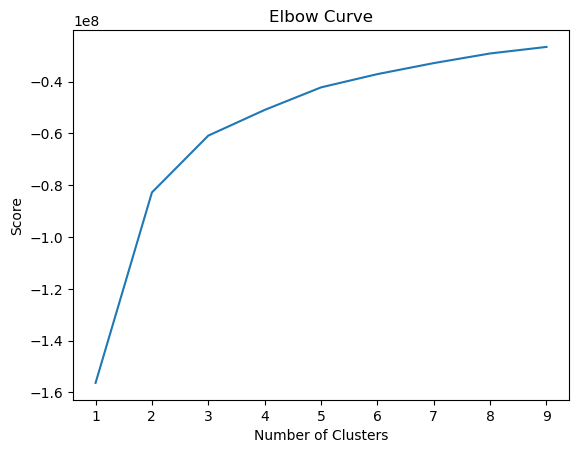

In [9]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

**Answers:**  
3 clusters would be chosen since the slope of the curve became weaker after 3.

### Step 5: Run the k-means algorithm.

In [10]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [11]:
# Fit the k-means object to the data.
kmeans.fit(sub_num)

/Users/minglunchen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

### Step 6: Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [12]:
sub_num['clusters'] = kmeans.fit_predict(sub_num)

/Users/minglunchen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/j4/lbgp6g5n3wj5p_xltrtb58hm0000gn/T/ipykernel_55558/3486657481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_num['clusters'] = kmeans.fit_predict(sub_num)


In [13]:
sub_num.head()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,clusters
0,4.0,0.0,9.0,1.60,71.67,27.99,1
1,0.0,0.0,6.0,1.78,95.25,30.13,0
2,0.0,0.0,8.0,1.85,108.86,31.66,2
3,5.0,0.0,9.0,1.70,90.72,31.32,0
4,3.0,15.0,5.0,1.55,79.38,33.07,0


In [14]:
sub_num['clusters'].value_counts()

clusters
0    110049
1    100245
2     35728
Name: count, dtype: int64

### Step 7 & 8:  
- Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.  
- Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.  
  - Note down your thoughts in a markdown cell.


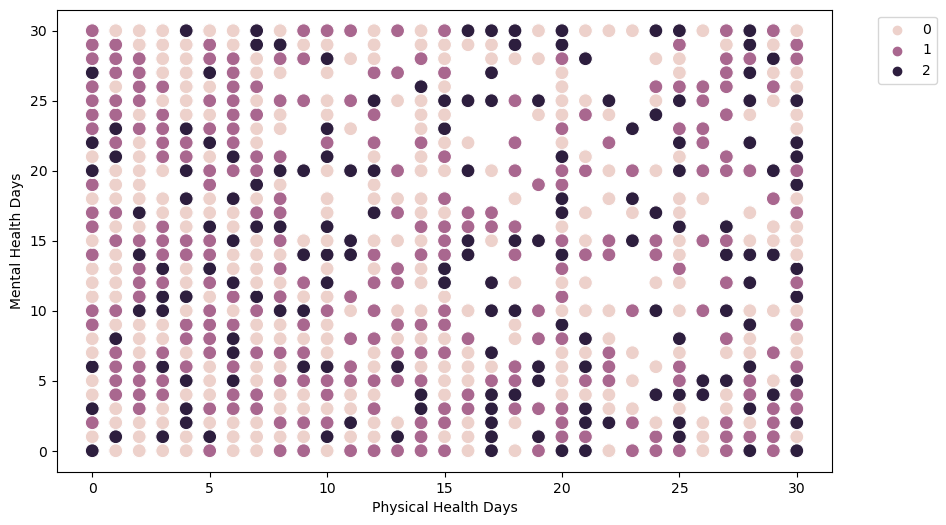

In [15]:
# Plot the clusters for the "PhysicalHealthDays" and "MentalHealthDays" variables.
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=sub_num['PhysicalHealthDays'], y=sub_num['MentalHealthDays'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Physical Health Days')
plt.ylabel('Mental Health Days') 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

No obvious cluster behaviour was observed between these two variables, a very weak fitness could be expected.

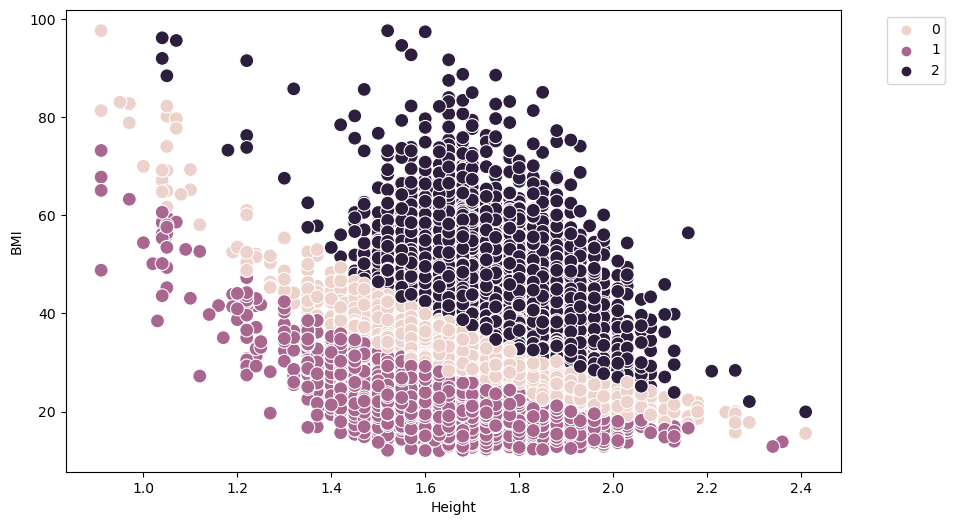

In [16]:
# Plot the clusters for the "HeightInMeters" and "BMI" variables.
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=sub_num['HeightInMeters'], y=sub_num['BMI'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Height')
plt.ylabel('BMI') 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Export the chart outside of Jupyter in the form of image file
plt.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cluster.png'))

In the scatterplot above, most data points with small BMI were in cluster '1', and most data points with large 'BMI' were in cluster '2'. The conclusion therefore could be made and confirmed by the cluster '0', showing that the 'Height' and 'BMI' has a negative linear relationship - that was not surprised since the BMI was calculated based on height.

### Step 9 & 10:  
- Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.  
- Propose what these results could be useful for in future steps of an analytics pipeline.

In [18]:
sub_num.loc[sub_num['clusters'] == 2, 'cluster'] = 'dark purple'
sub_num.loc[sub_num['clusters'] == 1, 'cluster'] = 'purple'
sub_num.loc[sub_num['clusters'] == 0, 'cluster'] = 'pink'

In [19]:
sub_num.groupby('cluster').agg({'PhysicalHealthDays':['mean', 'median'], 
                         'MentalHealthDays':['mean', 'median'], 
                         'HeightInMeters':['mean', 'median'],
                          'BMI':['mean', 'median']})

PhysicalHealthDays        MentalHealthDays        HeightInMeters  \
                          mean median             mean median           mean   
cluster                                                                        
dark purple           6.116155    0.0         5.587326    0.0       1.769624   
pink                  3.840198    0.0         3.738208    0.0       1.731445   
purple                3.713332    0.0         4.131857    0.0       1.653306   

                          BMI         
            median       mean median  
cluster                               
dark purple   1.78  39.068397  37.97  
pink          1.73  29.735782  29.27  
purple        1.65  23.789349  23.67

**Findings:**  
- There was no big difference among three clusters regarding to the 'PhysicalHealthDays' and 'MentalHealthDays', they were well distributed in the entire range, but no obvious cluster performance was found.  
- The pink cluster was the most representative in 'HeightInMeters' and 'BMI' since it widely covered the range.  
- Very relavent conclusions regarding the project hypotheses were not able to be made based on these limited numerical variables.